In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from LKC import *
from LKC_vis import *

In [2]:
current_directory = os.getcwd()
two_folders_up = os.path.abspath(os.path.join(current_directory, '..', '..'))
data_folder = os.path.join(two_folders_up, 'Data')
results_folder = os.path.join(two_folders_up, 'Results')

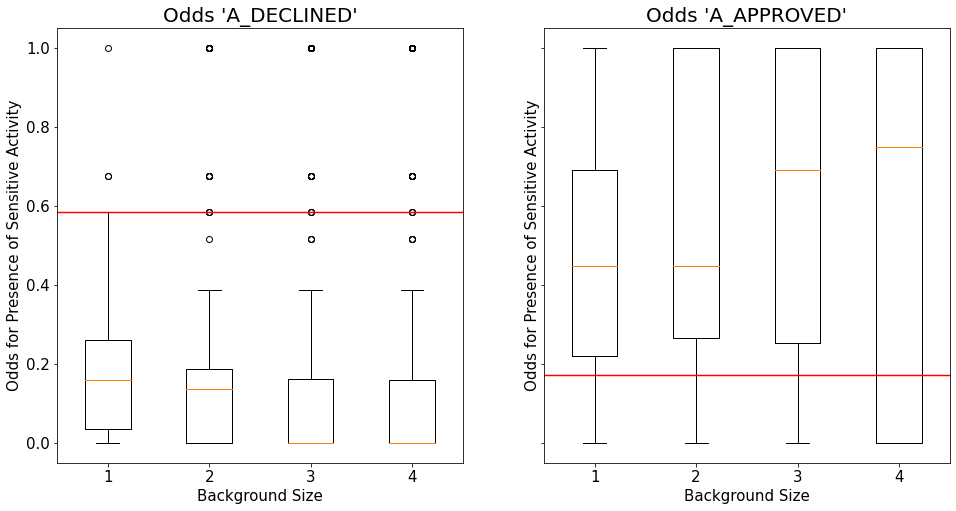

In [3]:
n_12 = ListIntegerMap.load_from_file(os.path.join(data_folder, "BPI 2012/Number5.json"))


# Certain activites have 0 and 1 correlation with declined
# Certain activites have 0 correlation with cancelled
# Certain activites have 0 and 1 correlation with approved (this one is particuarly bad)

fig, axs = plt.subplots(ncols = 2, figsize = (16,8), sharey=True)

create_confidence_boxplot(axs[0], n_12, "A_DECLINED")
create_confidence_boxplot(axs[1], n_12, "A_APPROVED")

axs[0].set_xlabel("Background Size", fontsize=15)
axs[1].set_xlabel("Background Size", fontsize=15)

axs[0].set_ylabel("Odds for Presence of Sensitive Activity", fontsize=15)
axs[1].set_ylabel("Odds for Presence of Sensitive Activity", fontsize=15)

axs[0].set_title(f"Odds 'A_DECLINED'", fontsize=20)
axs[1].set_title(f"Odds 'A_APPROVED'", fontsize=20)

axs[0].tick_params(axis='x', labelsize=15)
axs[1].tick_params(axis='x', labelsize=15)
axs[0].tick_params(axis='y', labelsize=15)

prob_line = n_12.pr_e(["A_DECLINED"])
axs[0].axhline(y = prob_line, color = 'r', linestyle = '-', linewidth = 1.4) 

prob_line = n_12.pr_e(["A_APPROVED"])
axs[1].axhline(y = prob_line, color = 'r', linestyle = '-', linewidth = 1.4) 

plt.savefig(os.path.join(results_folder, "Paper\\No_use_worst-case.png"))

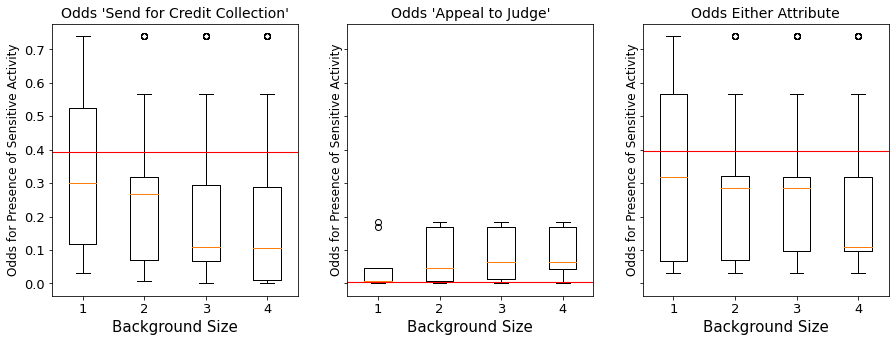

In [4]:
n_traffic = ListIntegerMap.load_from_file(os.path.join(data_folder, "Traffic Fines/Number5.json"))

# 'Insert Fine Notification', 'Send Fine', 'Create Fine' are perfectly correlated
# This group is very correlated with 'Send for Credit Collection', which explains the boxplot moving downwards

# The red line is the probability for the event given no background knowledge
# The plots show the odds of a sensitive activity being present in a trace given background knowledge for all possible
# background knowledge sets (aka all combinations of activities which are not a sensitive activity)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5), sharey=True)

create_confidence_boxplot(axs[0], n_traffic, "Send for Credit Collection")
create_confidence_boxplot(axs[1], n_traffic, "Appeal to Judge")
create_confidence_boxplot(axs[2], n_traffic, ["Send for Credit Collection", "Appeal to Judge"], custom_name = "Both")

plt.savefig(os.path.join(results_folder, "Traffic Fines\Confidence_Distribution.png"))

axs[0].set_xlabel("Background Size", fontsize=15)
axs[1].set_xlabel("Background Size", fontsize=15)
axs[2].set_xlabel("Background Size", fontsize=15)

axs[0].set_ylabel("Odds for Presence of Sensitive Activity", fontsize=12)
axs[1].set_ylabel("Odds for Presence of Sensitive Activity", fontsize=12)
axs[2].set_ylabel("Odds for Presence of Sensitive Activity", fontsize=12)

axs[0].set_title(f"Odds 'Send for Credit Collection'", fontsize=14)
axs[1].set_title(f"Odds 'Appeal to Judge'", fontsize=14)
axs[2].set_title(f"Odds Either Attribute", fontsize=14)

axs[0].tick_params(axis='x', labelsize=13)
axs[1].tick_params(axis='x', labelsize=13)
axs[2].tick_params(axis='x', labelsize=13)
axs[0].tick_params(axis='y', labelsize=13)

plt.savefig(os.path.join(results_folder, "Paper\\No_standard_combinations.png"))

In [5]:
datasets = ["BPI 2020/DomesticDeclarations", "BPI 2020/RequestForPayment", "Sepsis Cases", 
            "Traffic Fines", "Hospital Billing", "BPI 2020/InternationalDeclarations", "BPI 2020/PrepaidTravelCost",
            "BPI 2012","BPI 2020/PermitLog",  "BPI 2017"]
models = ["Alpha_", "Alpha+_", "IM_", "IMf20_", "Heuristic_", "Flower_"]
types = ["Knowledge", "Amount_4", "Percentage_0.05"]
stochastic_types = ["BillClintonEstimator", "AlignmentEstimator"]

In [6]:
dfs = []
for dataset in datasets:
    for df_type in types:
        df = pd.read_csv(os.path.join(results_folder, f"{dataset}/CC_{df_type}.csv"))
        df["Dataset"] = dataset
        df["Type"] = df_type
        dfs.append(df)
log_results = pd.concat(dfs, ignore_index=True)


dfs = []
for dataset in datasets:
    for df_type in types:
        df = pd.read_csv(os.path.join(results_folder, f"{dataset}/CC_Model_{df_type}_5_300.csv"))
        df["Dataset"] = dataset
        df["Type"] = df_type
        dfs.append(df)
model_results = pd.concat(dfs, ignore_index=True)


dfs = []
for dataset in datasets:
    for df_type in types:
        df = pd.read_csv(os.path.join(results_folder, f"{dataset}/CC_Model_Failed_{df_type}_5_300.csv"))
        df["Dataset"] = dataset
        df["Type"] = df_type
        dfs.append(df)
model_fail_results = pd.concat(dfs, ignore_index=True)

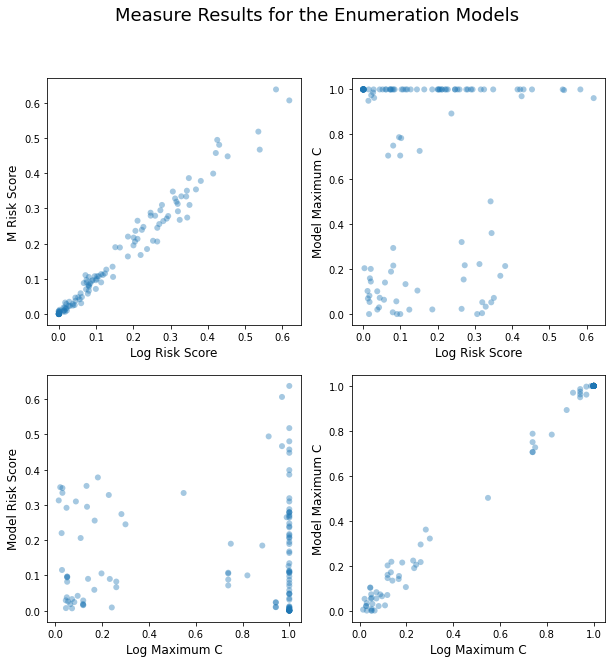

In [7]:
log_results = fix_stacking(log_results)
fig, ax = plt.subplots(2,2, figsize = (10,10))

ax[0,0].scatter(x = log_results["Confidence Privacy"], y = log_results["M Confidence Privacy"], alpha=0.4, edgecolors='none')
ax[0,0].set_xlabel("Log Risk Score", fontsize=12)
ax[0,0].set_ylabel("M Risk Score", fontsize=12)

ax[1,0].scatter(x = log_results["Max C"], y = log_results["M Confidence Privacy"], alpha=0.4, edgecolors='none')
ax[1,0].set_xlabel("Log Maximum C", fontsize=12)
ax[1,0].set_ylabel("Model Risk Score", fontsize=12)

ax[0,1].scatter(x = log_results["Confidence Privacy"], y = log_results["M Max C"], alpha=0.4, edgecolors='none')
ax[0,1].set_xlabel("Log Risk Score", fontsize=12)
ax[0,1].set_ylabel("Model Maximum C", fontsize=12)

ax[1,1].scatter(x = log_results["Max C"], y = log_results["M Max C"], alpha=0.4, edgecolors='none')
ax[1,1].set_xlabel("Log Maximum C", fontsize=12)
ax[1,1].set_ylabel("Model Maximum C", fontsize=12)

fig.suptitle("Measure Results for the Enumeration Models", fontsize=18)
fig.savefig(os.path.join(results_folder, "C + RS Enumeration Correlation.png"))

In [8]:
log_results_alt = log_results
log_results_alt = log_results_alt.rename(columns={"Confidence Privacy": "Log Risk Score", 
                                                  "Upper CC": "Log Upper CC", "Lower CC": "Log Lower CC", 
                                                  "Max C": "Log Maximum C"})
log_results_alt = log_results_alt.drop(["Sensitive Activities"], axis = 1)

model_results_alt = model_results
model_results_alt = model_results_alt.rename(columns={"Confidence Privacy": "Model Risk Score", 
                                                      "Upper CC": "Model Upper CC", 
                                                      "Lower CC": "Model Lower CC", "Max C": "Model Maximum C"})
model_results_alt = model_results_alt.drop(["Sensitive Activities"], axis = 1)

merged_results = pd.merge(log_results_alt, model_results_alt, on=["Dataset", "Type", "Background Size"])

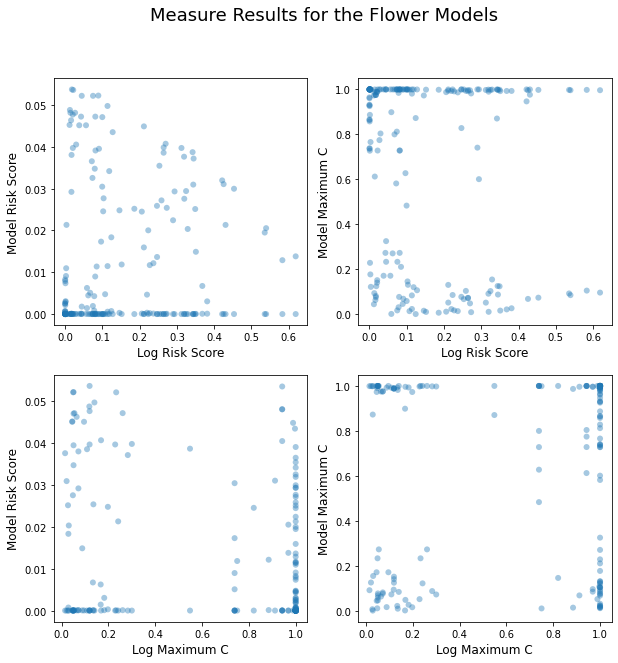

In [9]:
flower_results = merged_results[merged_results["Model"] == "Flower_"]

fig, ax = plt.subplots(2,2, figsize = (10,10))

ax[0,0].scatter(x = flower_results["Log Risk Score"], y = flower_results["Model Risk Score"], alpha=0.4, edgecolors='none')
ax[0,0].set_xlabel("Log Risk Score", fontsize=12)
ax[0,0].set_ylabel("Model Risk Score", fontsize=12)

ax[1,0].scatter(x = flower_results["Log Maximum C"], y = flower_results["Model Risk Score"], alpha=0.4, edgecolors='none')
ax[1,0].set_xlabel("Log Maximum C", fontsize=12)
ax[1,0].set_ylabel("Model Risk Score", fontsize=12)

ax[0,1].scatter(x = flower_results["Log Risk Score"], y = flower_results["Model Maximum C"], alpha=0.4, edgecolors='none')
ax[0,1].set_xlabel("Log Risk Score", fontsize=12)
ax[0,1].set_ylabel("Model Maximum C", fontsize=12)

ax[1,1].scatter(x = flower_results["Log Maximum C"], y = flower_results["Model Maximum C"], alpha=0.4, edgecolors='none')
ax[1,1].set_xlabel("Log Maximum C", fontsize=12)
ax[1,1].set_ylabel("Model Maximum C", fontsize=12)

fig.suptitle("Measure Results for the Flower Models", fontsize=18)
fig.savefig(os.path.join(results_folder, "C + RS Flower Correlation.png"))

In [10]:
successful_results = [["IMf20_"]*6+["IM_", "Heuristic_"], datasets[:6] + ["Traffic Fines", "Sepsis Cases"]]

successful_dfs = []
for model, dataset in [[successful_results[0][i], successful_results[1][i]] for i in range(len(successful_results[0]))]:
    successful_dfs.append(merged_results[(merged_results["Model"] == model) & (merged_results["Dataset"] == dataset)])

successful_results = pd.concat(successful_dfs, ignore_index=True)

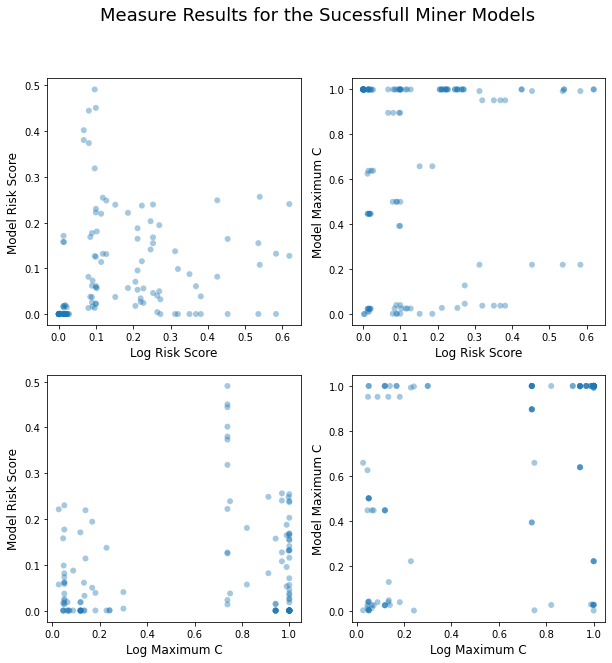

In [11]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

ax[0,0].scatter(x = successful_results["Log Risk Score"], y = successful_results["Model Risk Score"], alpha=0.4, edgecolors='none')
ax[0,0].set_xlabel("Log Risk Score", fontsize=12)
ax[0,0].set_ylabel("Model Risk Score", fontsize=12)

ax[1,0].scatter(x = successful_results["Log Maximum C"], y = successful_results["Model Risk Score"], alpha=0.4, edgecolors='none')
ax[1,0].set_xlabel("Log Maximum C", fontsize=12)
ax[1,0].set_ylabel("Model Risk Score", fontsize=12)

ax[0,1].scatter(x = successful_results["Log Risk Score"], y = successful_results["Model Maximum C"], alpha=0.4, edgecolors='none')
ax[0,1].set_xlabel("Log Risk Score", fontsize=12)
ax[0,1].set_ylabel("Model Maximum C", fontsize=12)

ax[1,1].scatter(x = successful_results["Log Maximum C"], y = successful_results["Model Maximum C"], alpha=0.4, edgecolors='none')
ax[1,1].set_xlabel("Log Maximum C", fontsize=12)
ax[1,1].set_ylabel("Model Maximum C", fontsize=12)

fig.suptitle("Measure Results for the Sucessfull Miner Models", fontsize=18)
fig.savefig(os.path.join(results_folder, "C + RS Miner Correlation.png"))

In [16]:
successful_results

,Background Size,Log Risk Score,Log Upper CC,Log Lower CC,Max K,Log Maximum C,Dataset,Type,M Confidence Privacy,M Max C,Model,Stochastic Type,Model Risk Score,Model Upper CC,Model Lower CC,Model Maximum C
0,1,0.000289,0.004617,16,1,1.000000,BPI 2020/DomesticDeclarations,Knowledge,0.000000,1.000000,IMf20_,BillClintonEstimator,0.000000,0.000000,15,1.000000
1,1,0.000289,0.004617,16,1,1.000000,BPI 2020/DomesticDeclarations,Knowledge,0.000000,1.000000,IMf20_,AlignmentEstimator,0.000000,0.000000,13,1.000000
2,2,0.000155,0.013758,89,1,1.000000,BPI 2020/DomesticDeclarations,Knowledge,0.000000,1.000000,IMf20_,BillClintonEstimator,0.000000,0.000000,114,1.000000
3,2,0.000155,0.013758,89,1,1.000000,BPI 2020/DomesticDeclarations,Knowledge,0.000000,1.000000,IMf20_,AlignmentEstimator,0.000000,0.000000,88,1.000000
4,3,0.000073,0.020154,276,1,1.000000,BPI 2020/DomesticDeclarations,Knowledge,0.008420,1.000000,IMf20_,BillClintonEstimator,0.000000,0.000000,495,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,0.012998,0.155972,12,110,0.118182,Sepsis Cases,Amount_4,0.018629,0.069288,Heuristic_,AlignmentEstimator,0.017675,0.212098,12,1.000000
125,2,0.018322,1.429125,78,47,0.119266,Sepsis Cases,Amount_4,0.015262,0.159177,Heuristic_,AlignmentEstimator,0.018934,1.230691,65,1.000000
126,1,0.011998,0.155972,13,56,0.045455,Sepsis Cases,Percentage_0.05,0.007013,0.102791,Heuristic_,BillClintonEstimator,0.157778,2.051111,13,0.625000
127,1,0.011998,0.155972,13,56,0.045455,Sepsis Cases,Percentage_0.05,0.007013,0.102791,Heuristic_,AlignmentEstimator,0.016315,0.212098,13,0.011139


# Below graphs are not used in the paper

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = log_results["Confidence Privacy"], y=log_results["Max C"], alpha=0.4, edgecolors='none')
ax.set_title("Correlation LKC vs CC for Log", fontsize=16)
ax.set_xlabel("Confidence Privacy", fontsize=12)
ax.set_ylabel("Maximum C for TLKC", fontsize=12)
fig.savefig(os.path.join(results_folder, "Log Correlation.png"))


fig, ax = plt.subplots()
ax.scatter(x = model_results["Confidence Privacy"], y = model_results["Max C"], alpha=0.4, edgecolors='none')
ax.set_title("Correlation LKC vs CC for Model", fontsize=16)
ax.set_xlabel("Confidence Privacy", fontsize=12)
ax.set_ylabel("Maximum C for TLKC", fontsize=12)

fig.savefig(os.path.join(results_folder, "Model Correlation.png"))

In [ ]:
log_results_alt = log_results
log_results_alt = log_results_alt.rename(columns={"Confidence Privacy": "Log Confidence Privacy", 
                                                  "Upper CC": "Log Upper CC", "Lower CC": "Log Lower CC", 
                                                  "Max C": "Log Max C"})
log_results_alt = log_results_alt.drop(["Sensitive Activities"], axis = 1)

model_results_alt = model_results
model_results_alt = model_results_alt.rename(columns={"Confidence Privacy": "Model Confidence Privacy", 
                                                      "Upper CC": "Model Upper CC", 
                                                      "Lower CC": "Model Lower CC", "Max C": "Model Max C"})
model_results_alt = model_results_alt.drop(["Sensitive Activities"], axis = 1)

merged_results = pd.merge(log_results_alt, model_results_alt, on=["Dataset", "Type", "Background Size"])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = merged_results["Log Confidence Privacy"], y=merged_results["Model Confidence Privacy"], alpha=0.4, edgecolors='none')
ax.set_title("Correlation CC Between Model and Log", fontsize=16)
ax.set_xlabel("Log Confidence Privacy", fontsize=12)
ax.set_ylabel("Model Confidence Privacy", fontsize=12)
fig.savefig(os.path.join(results_folder, "CC Corelation.png"))


fig, ax = plt.subplots()
ax.scatter(x = merged_results["Log Max C"], y=merged_results["Model Max C"], alpha=0.4, edgecolors='none')
ax.set_title("Correlation LKC Between Model and Log", fontsize=16)
ax.set_xlabel("Log Maximum C", fontsize=12)
ax.set_ylabel("Model Maximum C", fontsize=12)
fig.savefig(os.path.join(results_folder, "LKC Corelation.png"))

In [ ]:
def create_mean_barplot(ax, df, x, height, height2):
    bar_width = 0.4
    positions = np.arange(len(df))
    
    ax.bar(positions-bar_width / 2, height = df[height], width=bar_width, label=f"Mean {height}")
    ax.bar(positions+bar_width / 2, height = df[height2], width=bar_width, label=f"Mean {height2}")
    
    ax.set_xticks(positions)
    ax.set_xticklabels(df[x])

    ax.set_title(f"Mean per {x}", fontsize=15)
    #ax.set_xlabel(f"{x}", fontsize=12)
    ax.set_ylabel(f"Mean Values", fontsize=12)
    
    ax.legend()

In [ ]:
mean_per_type = model_results.groupby("Type", as_index=False).mean()
mean_per_dataset = model_results.groupby("Dataset", as_index=False).mean()
mean_per_background_size = model_results.groupby("Background Size", as_index=False).mean()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5), sharey=True)
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    
create_mean_barplot(ax[0], mean_per_dataset, "Dataset", "Confidence Privacy", "Max C")
ax[0].set_xticklabels(mean_per_dataset["Dataset"], rotation=75)
create_mean_barplot(ax[1], mean_per_type, "Type", "Confidence Privacy", "Max C")

fig.suptitle("Measure Results for the Logs", fontsize=18)
fig.savefig(os.path.join(results_folder, "Log Measures.png"))

In [ ]:
mean_per_model = model_results.groupby("Model", as_index=False).mean()
mean_per_type = model_results.groupby("Type", as_index=False).mean()
mean_per_stochastic_type = model_results.groupby("Stochastic Type", as_index=False).mean()
mean_per_dataset = model_results.groupby("Dataset", as_index=False).mean()
mean_per_background_size = model_results.groupby("Background Size", as_index=False).mean()

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), sharey=True)
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

create_mean_barplot(ax[0,0], mean_per_model, "Model", "Confidence Privacy", "Max C")
create_mean_barplot(ax[0,1], mean_per_stochastic_type, "Stochastic Type", "Confidence Privacy", "Max C")
create_mean_barplot(ax[1,0], mean_per_dataset, "Dataset", "Confidence Privacy", "Max C")
ax[1,0].set_xticklabels(mean_per_dataset["Dataset"], rotation=75)
create_mean_barplot(ax[1,1], mean_per_type, "Type", "Confidence Privacy", "Max C")

fig.suptitle("Measure Results for the Models", fontsize=18)
fig.savefig(os.path.join(results_folder, "Model Measures.png"))

In [ ]:
x = list(range(-100, 101))
y = [-ax**2 for ax in x]

fig, ax = plt.subplots()

# Plotting the data
ax.plot(x, y)

# Remove existing y-axis ticks and labels
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])

# Set custom labels
ax.text(-0.01, 0.96, 'Pirate', va='center', ha='right', transform=ax.transAxes, fontsize=14)
ax.text(-0.01, 0.04, 'Ninja', va='center', ha='right', transform=ax.transAxes, fontsize=14)

ax.text(0.10, -0.05, 'Low', va='center', ha='right', transform=ax.transAxes, fontsize=14)
ax.text(0.68, -0.05, 'Quality of the Media', va='center', ha='right', transform=ax.transAxes, fontsize=12)
ax.text(0.99, -0.05, 'High', va='center', ha='right', transform=ax.transAxes, fontsize=14)

plt.savefig("pirateVninja.png")
plt.show()